In [ ]:
# Common imports
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# random seed to make output stable across runs
np.random.seed(42)

# data visualization
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

<a id='data'></a>

# **California housing Dataset**

The dataset we will use is the "California Housing Prices" dataset from the statlib repository, which is based on data from the 1990 census. This dataset offers great opportunities for learning. The prediciton task for this dataset wil be to predict housing prices based on several features.

### Get the data:

In [ ]:
import pandas as pd
housing = pd.read_csv('/content/drive/MyDrive/housing.csv')

<a id='bigpop'></a>

Above you can see the top 5 rows of the dataset with the "head()" method. 

Each row  represents one district. The dataset has 10 attributes: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value and ocean_proximity.

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Now you can see a brief description of the data using the "info()" method above.

Notice that there are 20,640 instances (entries) in the whole dataset. Also notice that the total_bedrooms attribute has only 20,433 non-null values which means that 207 districts don't have this feature. You can also see that ocean_proximity is not numerical and probably a categorical attribute. You can find out how many districts belong to each attribute by using the "value_counts()" method, which I used below.

In [ ]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Now I will use the "describe()" method to show a summary of the numerical attributes:

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

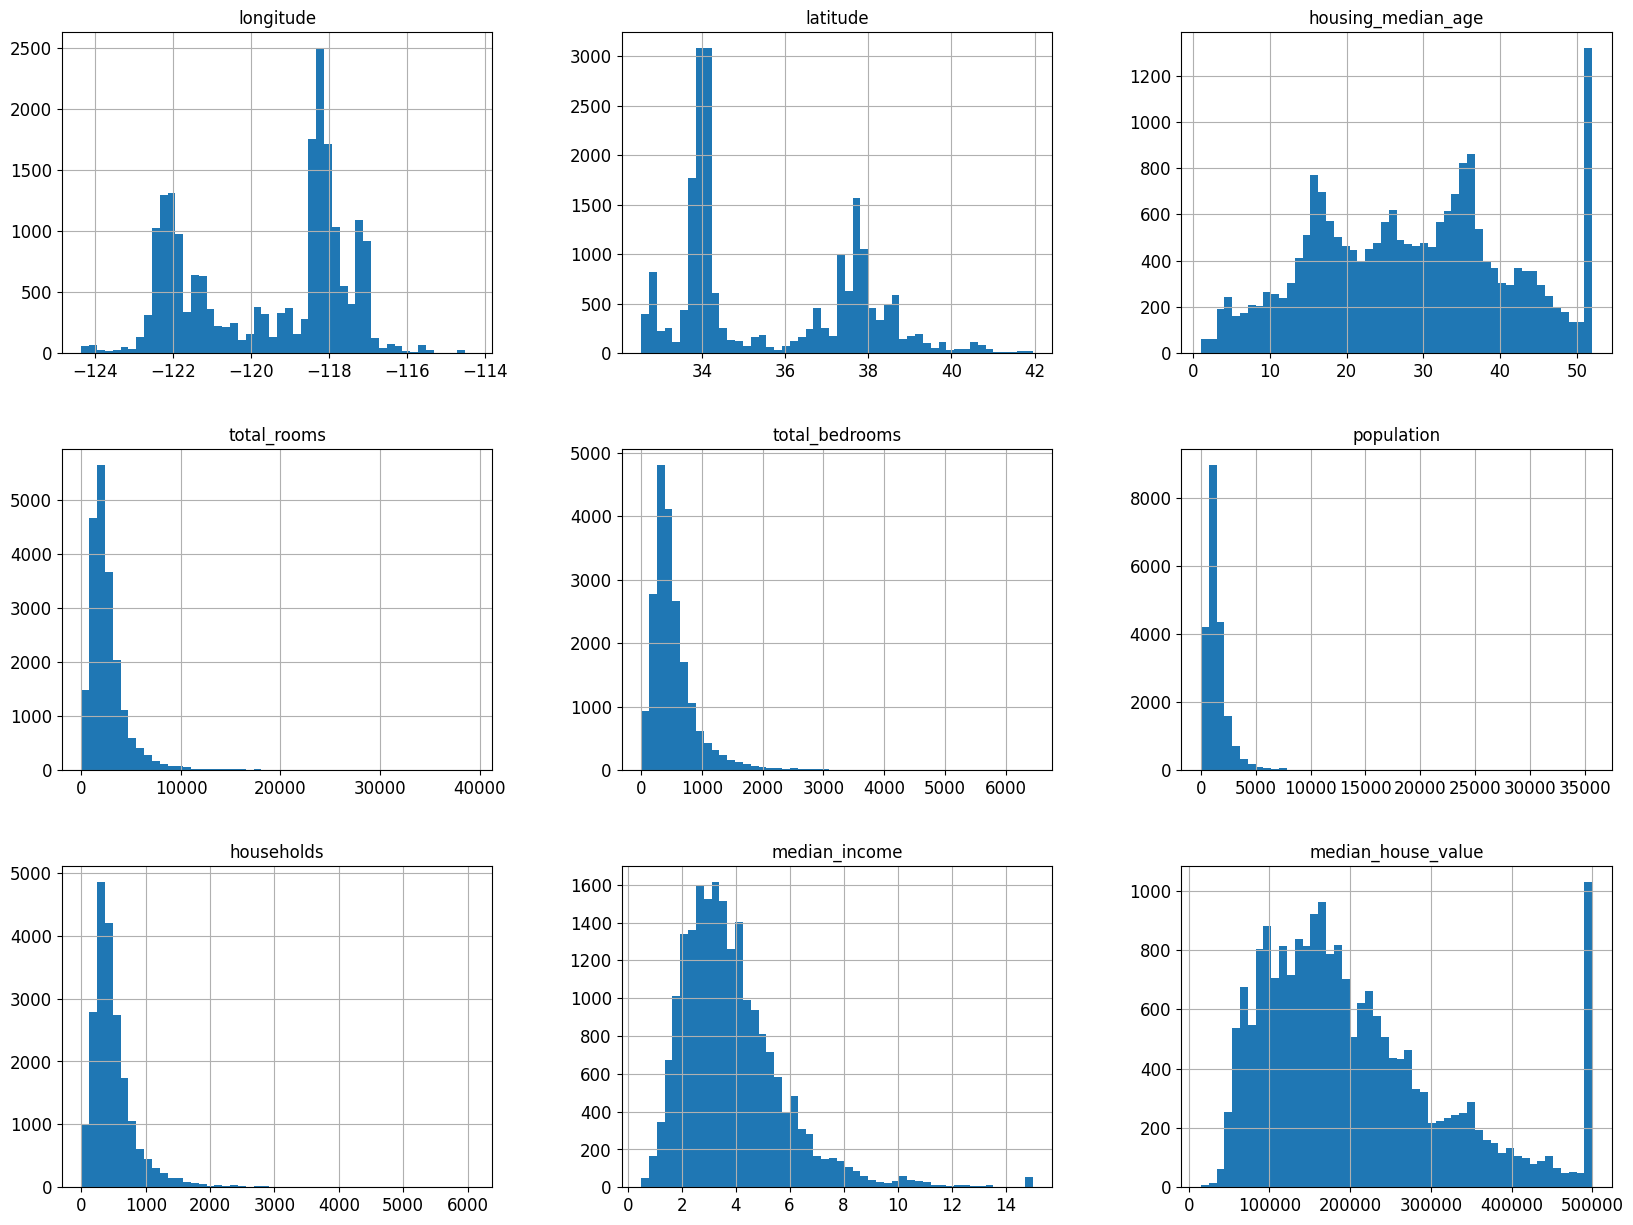

In [ ]:
%matplotlib inline
housing.hist(bins=50, figsize=(20, 15))

What you should notice about the histograms above:

* The attributes have varying scales, which we will discuss later on in this post.
* Many of the histograms are "tail heavy" which means that they extend further to the right of the median than to the left which makes it harder for an algortihm to detect patterns. We will transform the later on.
* The median_income attribute is not in US Dollar because the data has been scaled and capped at 15.0001 and at 0.4999. This is called a "preprocessed attribute" and is common within machine learning, but you should understand how the data was preprocessed.
* The housing_median_age and the median_house_value attributes are also capped. That the median_house_value is capped could be a serious problem, because this is your label (what you want to predict) and your model could learn that the price never goes beyond that limit. In this case we only have the option to remove the capped one or to collect the right labels for them.



<a id='split'></a>

In [ ]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(len(train_set), "Train Instances +", len(test_set), "Test Instances")

16512 Train Instances + 4128 Test Instances


Now we splitted our data purely random, which is fine if you have a large dataset, but if it is not, you could have a sampling bias. When a company decides to call 10,000 people because of a survey, they want to make sure that these people represent the whole population. For an example the US population consists out of 49% male and 51% female, so a well conducted survey would try to maintain this ratio, which is called **stratified sampling**.  The population is divided into homogeneous subgroups, called **strata** and the right number of instances is sampled from each **stratum** to makes sure that the data really represents the population. 

Imagine that you talked with real estate experts and they tell you, that the median_icome attribute is very important, when you want to predict housing prices. If that's the case, you want a test set that is really representative of the income categories of the dataset. Because median_income is continous, you need to convert it into a categorical attribute. If you look again at the holograms we analyzed detailed above, you may notice that most median income values are clustered around 20,000 - 50,000 but some go far beyond 60,000. It is very important that you don't have too many strata and that each stratum should have a sufficient number of instances. If this is not the case, the estimate of the stratums importance may be biased and your model could think that a stratum is less important. 

The code below transforms the median_income attribute into a categorical one by dividing the median income by 1.5 to limit the number of income categories and rounds it up using "np.ceil()" to have discrete categories. It merges all the categories that are greater than 5 into category 5. The categories are represented in the histogram below the code.

In [ ]:
housing["income_categories"] = np.ceil(housing["median_income"] / 1.5)
housing["income_categories"].where(housing["income_categories"] < 5, 5.0, inplace=True)

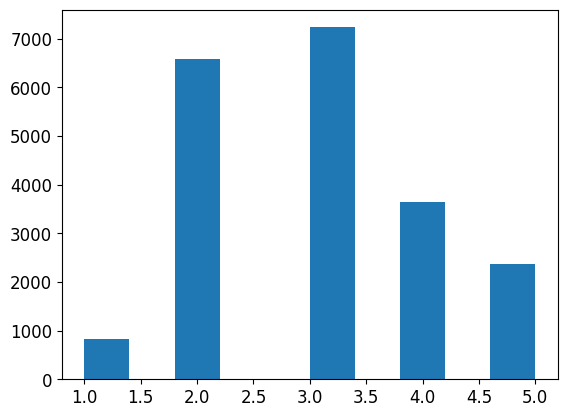

In [ ]:
plt.hist(housing["income_categories"])
fig = plt.gcf()


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_categories"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

The code below just generates the table and compares the different sampling types.

In [ ]:
def income_categories_proportions(data):
    return data["income_categories"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_categories_proportions(housing),
    "Stratified": income_categories_proportions(strat_test_set),
    "Random": income_categories_proportions(test_set),
}).sort_index()


In [ ]:
compare_props

,Overall,Stratified,Random
1.0,0.039826,0.039971,0.040213
2.0,0.318847,0.318798,0.324370
3.0,0.350581,0.350533,0.358527
4.0,0.176308,0.176357,0.167393
5.0,0.114438,0.114341,0.109496


Now we want to remove the income_categoreis attribute because we don't need it anymore.

In [ ]:
housing  = housing.drop(['income_categories'], axis=1)

<a id='explo'></a>

# Extensive Data Exploration

Now it is time for exploring the data. First of all, we want to visualize the geographical data with latitude and longitude. A good way to do this is to create a scatterplot of all the districts. It is important that you set alpha equal to 0.1, because then the scatterplot has a high density and therefore it is much easier to visualize.

<Axes: xlabel='longitude', ylabel='latitude'>

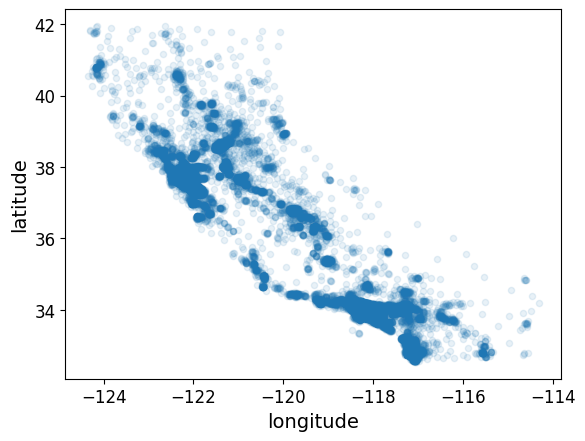

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


If you are fimiliar with California you can clearly see, the high density in the Bay Area, Los Angelos, San Diego and in the Central Valley around Sacramento and Fresno. Our brains are very good at finding patterns on pictures but you often need to play around with the parameters to make the important patterns really stand out.

Now we will look at the housing prices at the scatterplot below. The color represents the price and the radius of each circle represents the districts population.

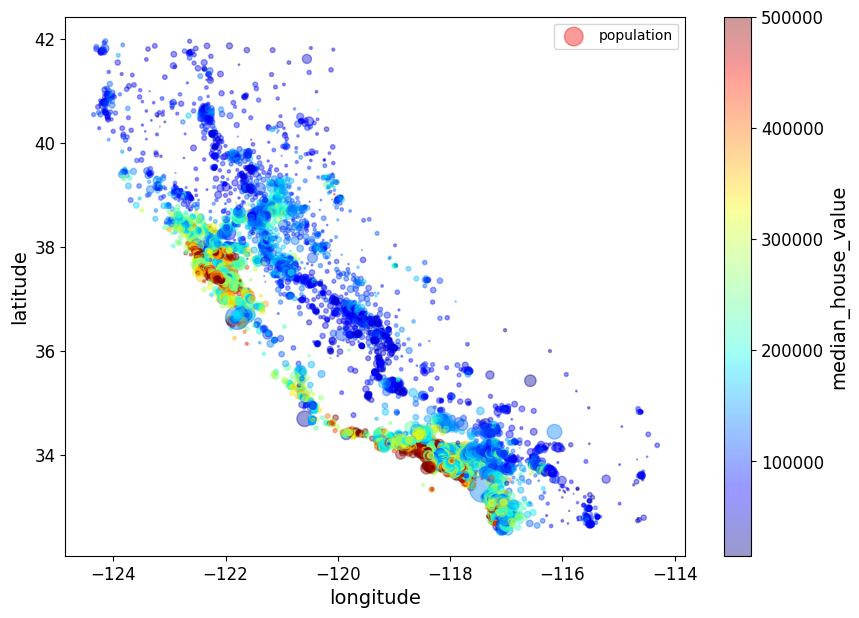

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

On the scatterplot we can see, that the housing prices are related to the location (close to the ocean) and to the population density, but we know that the housing prices of costoal districts are not that high in Northern California, so we can't make that rule as simple as that.  

<a id='corre'></a>


### Searching for Correlations:

The housing dataset isn't that large and therefore we can easily compute the correlations between every attribute using the "corr()" method. We will start by looking how much each attribute is correlated to the median house value.

In [ ]:
correlations = housing.corr()
correlations["median_house_value"].sort_values(ascending=False)

<ipython-input-17-c1fc9c1ef246>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = housing.corr()


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

The coefficient of the correlation ranges from 1 to -1. The closer it is to 1 the more correlated it is and vice versa.  Correlations that are close to 0, means that there is no correlation, neither negative or positive. You can see that the median_income is correlated the most with the median house value. Because of that, we will generate a more detailed scatterplot below:

<Axes: xlabel='median_income', ylabel='median_house_value'>

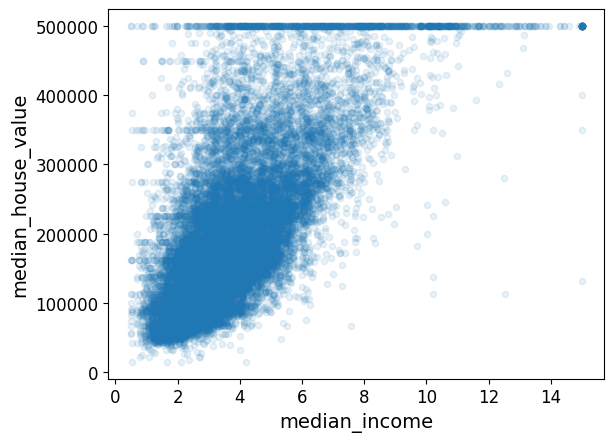

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

The scatterplot reveals, that the correlation is indeed very strong because we can clearly see an upward trend and the points are not to dispersed. We can also clearly see the price-cap, we talked about earlier, at 500 000 as a horizontal line. Other less obvious lines are around 450 000, 350 000 and 280 000. We may have to remove the corresponding districts to prevent the model from learning to reproduce these data faults. 

I hope that the previous explanation and visulizations made you more comfortable with the concepts of exploring data to gain insights. We identified a few very important faults in the data that we need to clean up before we can put the data into the machine learning model, that we will build later on. We also found some interesting correlations between the different attributes and we recognized the tail-heavy distribution, that we will also clean up later on. Of course a lot of things are different at every project you will work on, but the general guidelines will be the same and therefore you now already have a good understanding of some of those guidelines. 

Before we now actually prepare the data to fed it into the model, we should think about combinating a few attributes. For example, the number of rooms within a district is of course not very helpful, if you don't know how many households are within that district. You want the number of roms per household. The number of bedrooms isn't that helpful for the same reason, but it would make sense to compare it with the total number of rooms within a household. Also the population per household would be an interesting attribute. I will create these new attributes in the code below and then we will look at the correlation matrix again.

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

<ipython-input-20-51a0e6bf2eb4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

Now we see, that the bedrooms_per_room attribute is more correlated with the median house value than the total number of rooms or bedrooms. Houses with a lower bedroom/room ratio tend to be more expensive. The rooms_per_household attribute is also better than the total number of rooms in a district. Obviously the larger the house, the higher the price.

The part of exploring the data does not have to be fully thorough and accurated. The reason why we do it, is to gain a few important insights, that we can use when we build our model. Building proper Machine Learning models is a very iterative process, which means you gain some insights, build a model and then you try to gain more insights and update the model that it works better and so on. You will continue to do this, till you reached a satisfying accuracy and will probably try out several algorithms and paratemer adjustments on your way.

<a id='prep'></a>

# Data Preparation

Now it is time to prepare the data so that our model can process it. We will write functions that do this instead of doing it manually. The reason for this is, that you can reuse these on a new dataset and at new projects you will work on. But first, let's revert to a clean training set by copying start_train_set and let's separate the predictors and the labels since we don't necessarily want to apply the same tranformations to the predictors and the target values.

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

We noticed earlier that the total_bedrooms attribute has some missing values. Most Machine Learning algorithms can't work with datasets that have missing values. 

There are 3 ways to solve this problem:

1.) You could remove the whole attribute

2.) You could get rid of the districts that contain missing values.

3.) You could replace them with zeros, the median or the mean

We chose option 3 and will compute the median on the training set. Sklearn provides you with "Imputer" to do this. You first need to specify an Imputer instance, that specifies that you want to replace each attributes missing values with the median of that attribute. Because the median can only be computed on numerical attributes, we need to make a copy of the data without the ocean_proximity attribute that contains text and no numbers.

In [ ]:
median = housing["total_bedrooms"].median()

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

housing_num = housing.drop('ocean_proximity', axis=1)

Now we can fit the Imputer instance to the training data using the "fit()" method.

In [ ]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

The imputer has simply computed the median of each attribute and stored the result in the statistics variable. We apllied the imputer to all numerical attributes, because it's safer if your system will go live sometimes.

Now we can use the trained imputer to replace the missing values by the learned medians. This results in a plain numpy array but we will transform it back into a pandas dataframe. We will do these 2 steps in the code below.

In [ ]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index = list(housing.index.values))
housing_tr  = housing_tr.drop(['income_categories'], axis=1)

In [ ]:

sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


<a id='categ'></a>

### How to process Categorical Attributes and Text

Like I allready mentioned most of the machine learning algorithms can just work with numerical data. The ocean_proximity attribute is still a categorical feature and we will convert it now. We can use Pandas' factorize() method to convert this string categorical feature to an integer categorical feature.


In [ ]:
housing_cat = housing['ocean_proximity']
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 1, 0, 1, 2, 3, 2, 2, 2, 2])

In [ ]:
housing_categories

Index(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

One issues with this solution is that our algorithm will assume that two nearby values are more similar than two distant values, which is obviously not the case. For axample category 0 and 4 are more similar than categories 0 and 1. A common solution for this problem is to create one binary attribute per category: one attribute equal to 1 when the ctaegory is "<1H OCEAN" and 0 otherwise, another attribute equal to 1 when the category is "INLAND" and 0 otherwise, and so on. This is called "one-hot-encoding", because only one attribute will be equal to 1 (hot) and the others will be 0 (cold). 

We will do exactly this in the code cell below. We use the OneHotEncoder encoder, that sklearn provides,  to convert numeric categorical values into one-hot vectors. Note that "fit_transform()" expects a 2D array but "housing_cat" is a 1D array. Therefore we need to reshape it.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [ ]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]])

Note that there is a way that combines the two steps in one shot ( from categories to integer categories and then from integer categories to one-hot vectors). You can use Scikit-Learn's upcoming CategoricalEncoder class, which will soon be added to Scikit-Learn, and in the meantime you can use the code below (copied from Pull Request #9151 of Aurelien Geron).

In [ ]:
# copied from PR #9151.
# Just run this cell or copy it to your code. You don't need to understand it right now.

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

The CategoricalEncoder expects a 2D array, containing one or more categorical input features. We need to reshape housing_cat to a 2D array:

In [ ]:
cat_encoder = CategoricalEncoder()
housing_cat_reshaped = housing_cat.values.reshape(-1, 1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

We use toarray() again to get a dense array:

In [ ]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

<a id='custom'></a>

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): 
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [ ]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_categories,rooms_per_household,population_per_household
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,2.0,5.485836,3.168555
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,5.0,6.927083,2.623698
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,2.0,5.393333,2.223333
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,2.0,3.886128,1.859213
4,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,3.0,6.096552,3.167241


Here the transformer has one hyperparameter, which is set to true by default and allows you to easily find out whether adding this attribute helps the machine learning model or not. You can add any hyperparameter to gate any data preparation step you are not sure about. The more you automate the data prepration steps, the more combinations you can try out, which therefore makes it much more likely that you find a great one and save a lot of time.

<a id='scale'></a>

### Pipelines for tranformation

There are a lot of data tranformation steps that also need to be done in the right order. To help you with that, sklearn provides the **Pipeline** class. In the code below, you can see a small pipeline of attributes:

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

The Pipeline constructor takes a list of name/estimator pairs, which define a sequence of steps. Note that all instead of the last estimator must be transformers, which means that they must have a fit_transform() method.  Also note that if you call the pipelines fit() method, it calls fit_transform() on all transformers. In our example, the last estimator is a StandardScaler (for standardization), so the pipeline has a transform() method that applies all the transform to the data in sequence. 

Now it would be nice if we could feed a Pandas DataFrame directly into our pipeline, instead of having to first manually extract the numerical columns into a NumPy array. Unfortunately sklearn provides nothing that does this for us, so we have to write it by ourself:

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

This will tranform our data by selecting the desired attributes, dropping the others and converting the resulting dataframe into a NumPy array. With this in mind you can easily write a pipeline that takes a Pandas dataframe and handle only the numerical values. Just start the pipeline with a **DataFrameSelector** to pick only the numerical attributes. And you can just as easily write another one for the categorical attributes, by simply selecting categorical attributes using a **DataFrameSelector** and then applying a **LabelBinarizer**.

In [ ]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ])

But there is also a way to join these two pipelines into a single pipeline, using sklearns **FeatureUnion**. You can give it a list of transformer-pipelines. A complete pipeline that handles numerical and categorical attributes looks like this:

In [ ]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

The code below runs the whole pipeline:

In [ ]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

<a id='train'></a>

# Train Models

We looked at the big picture of your problem and framed it, we explored and visualized the data and preprocessed it. Now it is time to select and train a Machine Learning model. The hard part were the previous steps. What we do now, is going to be much simpler and easier.

First, let's test whether a Linear Regression model gives us a satisfying result:

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

Let's try it out on the training set:

In [ ]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

In [ ]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68376.51254853733

This is clearly not a great score. Since most districts median_housing_values range between 120,000 and 265,000 dollar, a prediction erro of $68,376 is not very satisfying and also an example of a model underfitting the data. This either means that the features do not provide  enough information to make proper predictions, or that the model is just not powerful enough.


The main ways to fix underfitting are:

1.) feed the model with better features

2.) select a more powerful model

3.) reduce the constraints on the model


First let's try out a more powerful model since we just only tested one.

Let's use a DecisionTreeRegressor, which can find complex nonlinear relationships in the data:

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

Let's try it out on the training set:

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

This gives you no error at all, which means that we strongly overfitted our data. How can we be sure ? As we allready discussed earlier, you don't want to use the test set until you are confident about your model. But how can we test how our model performs if we can't use the test data ? One way to do this is using **K-Fold Cross-Validation**, which uses part of the training set for training and a part for validation. The following code randomly splits the training set into 10 subset called **folds**. Then it trains and evaluates 10 times, using every fold once for either training or validation:

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

Let's look at the result:

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [72237.45096271 69208.53094621 69286.11573206 70612.13634405
 70577.30202088 76840.97092314 71823.83279699 72710.22512908
 67780.77127665 71678.17802175]
Mean: 71275.55141535088
Standard deviation: 2362.02756776275


Now we have a real estimate of how the decision tree performs. In fact, it does even perform worse than our previous linear regression model.
Note that cross validation not only gives you an estimate of your models performance, but also of how precise this estimate is (standard deviation). Here we have a prediction error of 71,085 dollar. The standard deviation is 2,431 Dollar, which means that our prediction error could be $2,431 more or less.

Now let's compute the scores for our linear regression model again, but using K-Fold Cross-Validation:

In [ ]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71523.78333874 64044.46774989 67454.97869698 68514.10137273
 66303.62531226 72166.63405138 74464.08841381 68570.11804395
 66063.64175868 69870.86192291]
Mean: 68897.63006613276
Standard deviation: 3002.746127534861


Now we defenitely know that our decision tree model is overfitting and performs worse than our linear regression model. Now let's try one last model, the RandomForestRegressor. Random Forest works by training many Decision Trees on random subsets of the features and then it averages their predictions. Building a model on top of other models is called **Essemble Learning** and often pushes Machine Learning algortihms further.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [ ]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18675.224916252282

In [ ]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51553.65292335 48797.89565614 47005.23947642 52046.73567245
 47700.78025873 51824.08544879 52582.59165129 49949.79025967
 48680.25622229 54019.67674791]
Mean: 50416.070431704204
Standard deviation: 2201.612779754884


<a id='tune'></a>

# Fine Tuning

Now let's assume you played around with different algorithms and have a rough estimate over the best performing ones. We will now look at Grid Search as an example to fine tune your model.


### Grid Search
Instead of trying out different hyperparametrs manually until you find some great combinations, you can let Grid Search do that for you. All you need to do is tell it which hyperparameters you want to experiment with and what values. The code below searches for the best combination of hyperparameter values for the RandomForestRegressor: 

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

This tells us that the best solution would be by setting the max_features to 8 and the n_estimators to 30.

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64794.30269596007 {'max_features': 2, 'n_estimators': 3}
56170.628706376316 {'max_features': 2, 'n_estimators': 10}
53112.07892952066 {'max_features': 2, 'n_estimators': 30}
61836.14128922096 {'max_features': 4, 'n_estimators': 3}
54015.050600771814 {'max_features': 4, 'n_estimators': 10}
51501.312925751794 {'max_features': 4, 'n_estimators': 30}
59654.781331729675 {'max_features': 6, 'n_estimators': 3}
52654.921131020776 {'max_features': 6, 'n_estimators': 10}
50743.74265388978 {'max_features': 6, 'n_estimators': 30}
60051.26348940765 {'max_features': 8, 'n_estimators': 3}
52909.31100796091 {'max_features': 8, 'n_estimators': 10}
50800.78516244517 {'max_features': 8, 'n_estimators': 30}
63176.30025923348 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54596.210174483705 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60999.682580275425 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53236.2602917408 {'bootstrap': False, 'max_features': 3, 'n_estimator

<a id='evaluation'></a>

# Evaluation

Now we can evaluate the final model on the test set. You just have to get the labels from your test set, run your full_pipeline to transform the data and eveluate the model:

In [ ]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

We now have a final prediciton error of $49,036 and learned a lot of things on the way. Note that usually the performance on the test set is slightly worse, because your system is fine tuned to perform well on the training set. 

Hopefully all of this gave you a good idea of what a machine learning project looks like and a blueprint for you to build great systems in the future. As I already mentioned, most of the work has to be done before you select and train an algorithm. Note that it is propably better to know four or five machine learning algorithms very well rather than spending all your time exploring advanced algorithms and not enough time on the overall process.

In [ ]:
final_rmse

48557.33618531538

<a id='summary'></a>